In [66]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy as np


In [67]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

selection_img = []
selection_labels = []

c = random.randint(50, 50000)
print(c)
n = 1000

i=0
while i < n:
    p = random.randint(50, 40000)
    selection_img.append(train_images[p])
    selection_labels.append(train_labels[p])
    i += 1
assert len(selection_img) == n

selection_img = np.array(selection_img)
selection_labels = np.array(selection_labels)
assert len(selection_img) == n

1360


In [68]:
selection_img[1].shape

(28, 28)

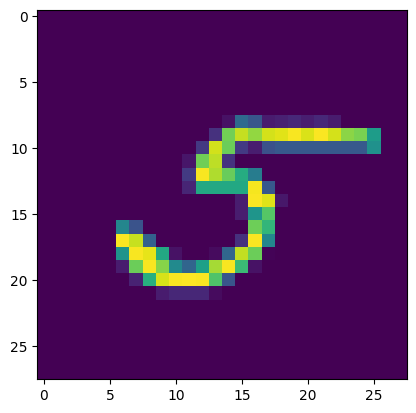

In [69]:
plt.imshow(selection_img[19])

In [77]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [71]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(selection_img, selection_labels, epochs=9, batch_size=2**11, 
                    validation_data=(test_images, test_labels))

Epoch 1/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.1120 - loss: 48.5177 - val_accuracy: 0.1275 - val_loss: 28.9219
Epoch 2/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step - accuracy: 0.1330 - loss: 28.9148 - val_accuracy: 0.1592 - val_loss: 24.3249
Epoch 3/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 626ms/step - accuracy: 0.1660 - loss: 24.4470 - val_accuracy: 0.1298 - val_loss: 18.6818
Epoch 4/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step - accuracy: 0.1290 - loss: 18.8173 - val_accuracy: 0.1308 - val_loss: 14.6285
Epoch 5/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step - accuracy: 0.1310 - loss: 14.5580 - val_accuracy: 0.1820 - val_loss: 10.9390
Epoch 6/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step - accuracy: 0.1940 - loss: 10.8034 - val_accuracy: 0.2025 - val_loss: 8.2526
Epoch 7/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step - accuracy: 0.2130 - loss: 8.1689 - val_accuracy: 0.2245 - val_loss: 5.8517
Epoch 8/9
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 617ms/step - accuracy: 0.2380 - loss: 5.7613 - val_accuracy: 0.2664 - val_loss:

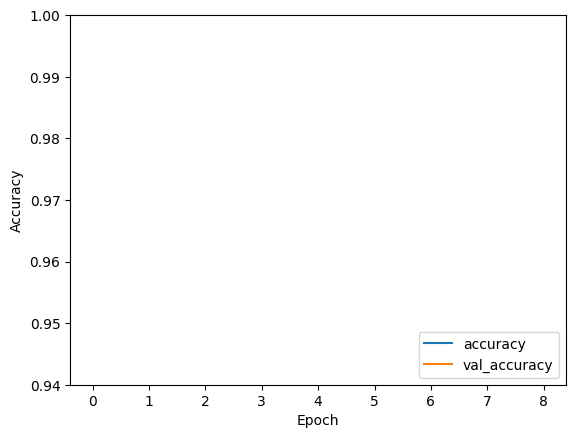

In [73]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.94, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [74]:
fc_model = models.Sequential()
fc_model.add(layers.Flatten(input_shape=(28, 28, 1)))
fc_model.add(layers.Dense(64, activation='relu'))
fc_model.add(layers.Dense(256, activation='relu'))
fc_model.add(layers.Dense(128, activation='relu'))
fc_model.add(layers.Dense(10))
fc_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,066 (394.79 KB)

 Trainable params: 101,066 (394.79 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
fc_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = fc_model.fit(train_images, train_labels, epochs=19, batch_size=2**11,
                       validation_data=(test_images, test_labels))

Epoch 1/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4177 - loss: 15.6053 - val_accuracy: 0.7225 - val_loss: 1.2895
Epoch 2/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7484 - loss: 1.1079 - val_accuracy: 0.8024 - val_loss: 0.7737
Epoch 3/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8176 - loss: 0.7050 - val_accuracy: 0.8383 - val_loss: 0.6190
Epoch 4/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8530 - loss: 0.5398 - val_accuracy: 0.8599 - val_loss: 0.5313
Epoch 5/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8783 - loss: 0.4372 - val_accuracy: 0.8771 - val_loss: 0.4639
Epoch 6/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8949 - loss: 0.3731 - val_accuracy: 0.8882 - val_loss: 0.4265
Epoch 7/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9082 - loss: 0.3144 - val_accuracy: 0.8944 - val_loss: 0.3981
Epoch 8/19
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9165 - loss: 0.2879 - val_accuracy: 0.9004 - 

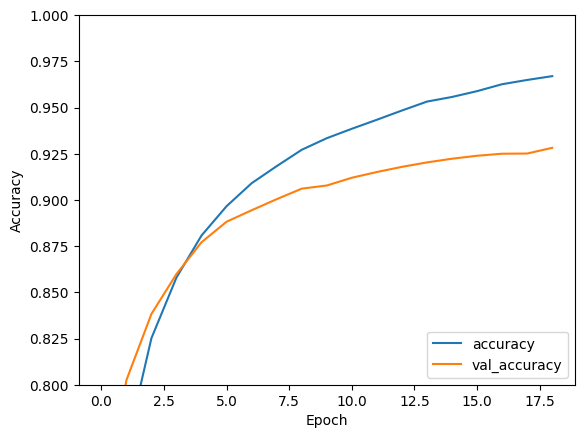

In [76]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')